In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import math 
from keras.models import Sequential 
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import datetime

In [2]:
from google.colab import files
uploaded = files.upload()

Saving NIFTY dataset.csv to NIFTY dataset.csv


In [3]:
import io

In [4]:
df = pd.read_csv(io.BytesIO(uploaded['NIFTY dataset.csv']))

In [5]:
df.head()

,Type,Date,Time,open,high,low,close
0,NIFTY,20210101,09:08,13996.10,13996.10,13996.10,13996.10
1,NIFTY,20210101,09:16,13997.90,14020.85,13991.35,14013.15
2,NIFTY,20210101,09:17,14014.85,14018.55,14008.15,14009.05
3,NIFTY,20210101,09:18,14008.05,14013.10,14005.05,14012.70
4,NIFTY,20210101,09:19,14013.65,14019.10,14013.65,14016.20


In [6]:
df['Date'].dtype

dtype('int64')

In [7]:
df.isnull().sum()

Type     0
Date     0
Time     0
open     0
high     0
low      0
close    0
dtype: int64

In [8]:
df.shape

(22806, 7)

Text(0, 0.5, 'Close Price (in Rs.)')

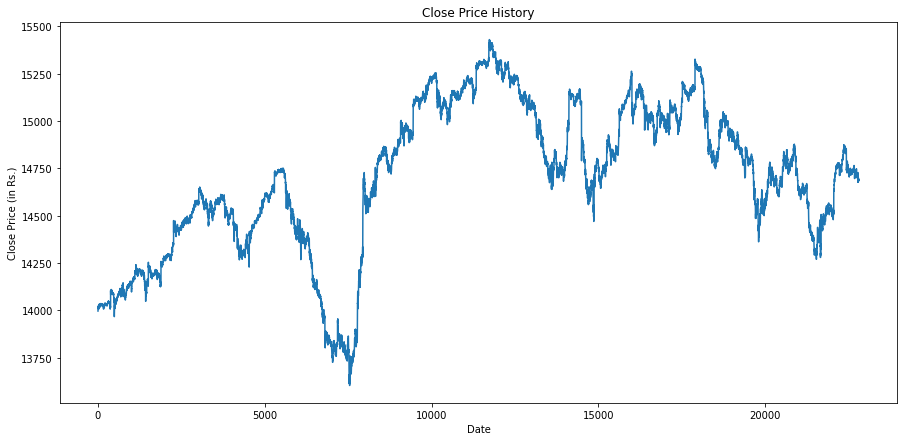

In [9]:
#Vizualizing the closing price history
plt.figure(figsize=(15,7))
plt.title('Close Price History')
plt.plot(df['close'])
plt.xlabel('Date')
plt.ylabel('Close Price (in Rs.)')

In [10]:
#Creating a new dataframe with only close column
data = df.filter(['close'])

#Convert dataframe to numpy
dataset = data.values

training_data_len = math.ceil( len(dataset) * 0.65 )
training_data_len

14824

In [11]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.21522382],
       [0.22455401],
       [0.22231039],
       ...,
       [0.59565503],
       [0.59661267],
       [0.59532669]])

In [12]:
time_step = 1

In [13]:
#create scaled training dataset
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(time_step, len(train_data) ):
  x_train.append(train_data[i-time_step:i, 0])
  y_train.append(train_data[i, 0])

In [14]:
#converting training data to numpy for using LSTM model
x_train , y_train = np.array(x_train) , np.array(y_train)

In [15]:
#Reshape the data
x_train = np.reshape(x_train , (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(14823, 1, 1)

In [16]:
#Creating the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1) ))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(25))
model.add(Dense(1))

In [17]:
model.compile( optimizer = 'adam', loss = 'mean_squared_error')

In [25]:
#Training the model
model.fit(x_train, y_train, batch_size= 10, epochs= 100)

Epoch 1/100
1483/1483 [==============================] - 7s 5ms/step - loss: 3.6170e-05
Epoch 2/100
1483/1483 [==============================] - 7s 5ms/step - loss: 3.1523e-05
Epoch 3/100
1483/1483 [==============================] - 7s 5ms/step - loss: 3.4244e-05
Epoch 4/100
1483/1483 [==============================] - 8s 6ms/step - loss: 3.4502e-05
Epoch 5/100
1483/1483 [==============================] - 7s 5ms/step - loss: 3.4589e-05
Epoch 6/100
1483/1483 [==============================] - 7s 5ms/step - loss: 3.4044e-05
Epoch 7/100
1483/1483 [==============================] - 7s 5ms/step - loss: 3.2284e-05
Epoch 8/100
1483/1483 [==============================] - 7s 5ms/step - loss: 3.3239e-05
Epoch 9/100
1483/1483 [==============================] - 7s 5ms/step - loss: 3.2550e-05
Epoch 10/100
1483/1483 [==============================] - 7s 5ms/step - loss: 3.1465e-05
Epoch 11/100
1483/1483 [==============================] - 7s 5ms/step - loss: 3.2498e-05
Epoch 12/100
1483/1483 [======

In [26]:
#testing dataset
test_data = scaled_data[training_data_len - time_step: , :]

x_test = []
y_test = dataset[training_data_len: , :]

for i in range(time_step, len(test_data)):
  x_test.append(test_data[i-time_step:i, 0])

In [27]:
#convert to numpy and reshape
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [28]:
#Model's predicted values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [29]:
#Error
rmse = np.sqrt((np.mean(predictions - y_test)**2))
print("The error rate of the model is", rmse)

The error rate of the model is 0.38309798119988636


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


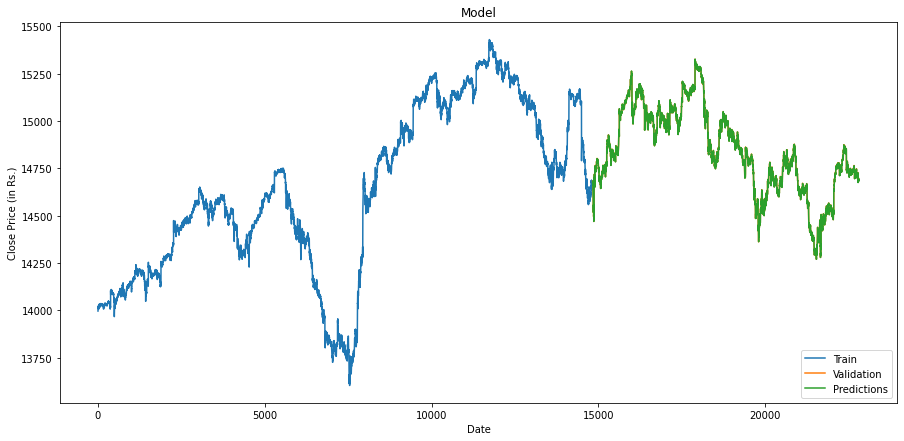

In [30]:
train = data[:training_data_len]
validation_dataset = data[training_data_len:]
validation_dataset['Predictions'] = predictions

plt.figure(figsize=(15,7))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price (in Rs.)')
plt.plot(train['close'])
plt.plot(validation_dataset[['close','Predictions']])
plt.legend(['Train', 'Validation' , 'Predictions'], loc= 'lower right')
plt.show()

In [31]:
validation_dataset

,close,Predictions
14824,14681.75,14675.378906
14825,14679.45,14680.609375
14826,14684.70,14678.317383
14827,14676.45,14683.548828
14828,14679.20,14675.328125
...,...,...
22801,14690.60,14686.491211
22802,14689.30,14689.430664
22803,14691.30,14688.133789
22804,14693.05,14690.127930
